

Tarea práctica 4 - Análisis Numérico

Edison Santiago Tutalcha Bastidas

Código: 1927038-3147


**Ejercicio 1 (50%)**

Considere el sistema de ecuaciones lineales


\begin{matrix}
5 x &   -y & z  & = 10,\\
2 x & + 8y & -z & = 11,\\
 -x &  y &  4z  & = 3.
\end{matrix}

1. Realize un programa que determine si el sistema lineal puede ser resuelto utilizando un metodo iterativo.

2. Resuelva el sistema de ecuaciones utilizando el metodo de Jacobi con una presicion de $10^{-5}$ en la norma euclidiana.

3. Estime una cota para el error de la solución numerica obtenida en el punto anterior. 

4. Realize un programa que grafique los discos de Gershgorin para los valores propios de la matriz del sistema.

Norma de la matriz G: (0.44086137500301703+0.413449664236131j)
Luego, el método de Jacobi es convergente, es decir, el sistema lineal puede resolverse usando un método iterativo.
La solucion del sistema usando el método de Jacobi: [1.99999842 1.00000165 0.99999958]
Una cota para el error usando el método de Jacobi es: (1.1863926433918994e-06+6.491538761545995e-06j)


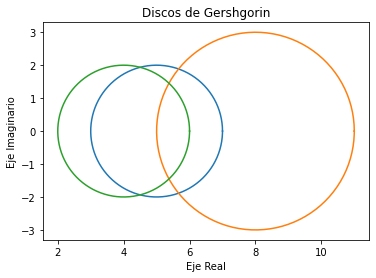

In [16]:
import numpy as np
import matplotlib.pyplot as plt

#Definimos las matrices/vectores para el método de Jacobi

A=np.array([[5,-1,1],
            [2,8,-1],
            [-1,1,4]])

B=np.array([[5,0,0],        #Diagonal de A
            [0,8,0],
            [0,0,4]])

b=np.array([10,11,3])       #Vector b del sistema Ax=b

#Definimos las normas a usar

def Norma_vectorial(x):
  return np.linalg.norm(x)

def Norma_espectral(A):
  Eval, Evec=np.linalg.eig(A)
  Emax=np.max(Eval)
  return np.sqrt(Emax)



# 1) Verificamos si se puede utilizar un método iterativo.

# Matriz de iteración
G=np.identity(3)-(np.linalg.inv(B)@A)

print("Norma de la matriz G:", Norma_espectral(G))
print("Luego, el método de Jacobi es convergente, es decir, el sistema lineal puede resolverse usando un método iterativo.")



# 2) Usamos el método de Jacobi para solucionar el sistema lineal:


x_0=np.array([0,0,0]) #Vectores iniciales de la iteración
x=np.array([1,1,1])

precision = Norma_vectorial(x-x_0) 
exactitud = 10**(-5)
 
# Establecemos como parámetro la precisión de cada diferencia con respecto a la exactitud solicitada para seguir efectuando las iteraciones

while precision>exactitud:

  x=x_0
  x_0=(G@x)+(np.linalg.inv(B)@b)
  precision = Norma_vectorial(x-x_0)

print("La solucion del sistema usando el método de Jacobi:",x_0)




# 3) Cota para el error en la solución del punto 2)

# Usando el teorema visto en clase:

Cota =((Norma_espectral(G))/(1-Norma_espectral(G)))*(Norma_vectorial(x_0-x))
print("Una cota para el error usando el método de Jacobi es:", Cota)



# 4) Graficar los discos de Gershgorin

#Definimos una lista para los radio y definimos la diagonal
diagonal=np.array([5,8,4])
radios_ger=[]

#Calculamos los radios usando la fórmula de Gershgorin (Doble sumatoria)
for i in range(3):
  sum=0

  for j in range(3):
    if i==j:
      sum+=abs(0)
    else:
      sum+=abs(A[i][j])

  radios_ger+=[sum] #Añadimos los valores a la lista
# Los centros se encuentran sobre el eje real


# Definimos nuestras variables a graficar y el dominio
dominio_angulo=np.linspace(0, 2*np.pi, 200)
figura,ejes=plt.subplots(1)

radio = 0


# Graficador
for i in range(3): #Recorre los 3 graficos que saldrán de los valores de la diagonal
  radio = radios_ger[i]
 
 # Condiciones a,b para graficar sobre los ejes coordenados 
  a=diagonal[i]+radio*np.cos(dominio_angulo)
  b=radio*np.sin(dominio_angulo)

  ejes.plot(a,b)


#Establecemos los parámetros para el gráfico 
ejes.set_aspect(1)

plt.title('Discos de Gershgorin')

plt.xlabel('Eje Real')
plt.ylabel('Eje Imaginario')
plt.show()


Ejercicio 2 (50%)

Considere el sistema lineal Ax=b con:


$
A=
\begin{pmatrix}
5 & -3 & 0 & 2 \\
2 & 6  & -3 & 0 \\
-1& 2  & 4 & -1 \\
-2 & -3 & 2 & 7
\end{pmatrix} 
$  y $
b=
\begin{pmatrix}
-12  \\
-18   \\
9 \\
13  
\end{pmatrix}.\\
$

Aplique el metodo de relajación para 10 valores del parametro de relajación ω entre 0.1 y 1.0. Luego establezca un grafico que muestre la relajación entre el numero de iteraciones necesarias para alcanzar una precisión de $10^{−5}$ en la norma Euclidiana con el método de relajación y el valor empleado del parámetro ω. ¿Cuál es el valor de ω para el cual se requieren menos operaciones (valor optimo)?


la solucion del sistema usando Jacobi relajado con el valor de Omega: 0.1 es: [-2.99996957e+00 -9.99967929e-01  2.00006611e+00  5.60698816e-05]
la solucion del sistema usando Jacobi relajado con el valor de Omega: 0.2 es: [-2.99998661e+00 -9.99971221e-01  2.00002151e+00  2.26241222e-05]
la solucion del sistema usando Jacobi relajado con el valor de Omega: 0.30000000000000004 es: [-2.99998852e+00 -9.99990791e-01  2.00000199e+00  1.80104843e-05]
la solucion del sistema usando Jacobi relajado con el valor de Omega: 0.4 es: [-3.00000416e+00 -1.00000005e+00  2.00000695e+00  7.26820652e-06]
la solucion del sistema usando Jacobi relajado con el valor de Omega: 0.5 es: [-2.99999537e+00 -1.00000003e+00  1.99999628e+00  3.27362619e-06]
la solucion del sistema usando Jacobi relajado con el valor de Omega: 0.6 es: [-2.99999660e+00 -9.99999739e-01  1.99999715e+00  1.27360879e-06]
la solucion del sistema usando Jacobi relajado con el valor de Omega: 0.7000000000000001 es: [-3.00000180e+00 -1.0000030

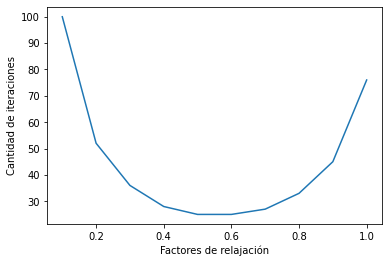

Graficamente concluimos que en w=0,5 w=0,6 se obtienen menos iteraciones (Valor óptimo)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Note que vamos a requerir algunas funciones y valores similares al caso de Jacobi normal, por tanto el código se basa estructuralmente en Jacobi normal.

# Definimos las matrices y vectores del sistema Ax=b

A = np.array([[5,-3,0,2],
            [2,6,-3,0],
            [-1,2,4,-1],
            [-2,-3,2,7]])

A_D = np.array([[5,0,0,0],  # Matriz diagonal de A
            [0,6,0,0],
            [0,0,4,0],
            [0,0,0,7]])

b = np.array([-12,-18,9,13])


# Lista con la cantidad de iteraciones, que al final graficaremos para hallar el valor óptimo
No_iteraciones=[]

# Definimos los valores que Omega va a recorrer
w=np.arange(0.1,1.1,0.1)


# Iteraciones para cada valor de Omega
for i in w: # Definimos las variables para nuestro While

  iterador=0                      # Contador de iteraciones 

  x=np.array([1,1,1,1])           # Vectores iniciales de la iteración
  x_0=np.array([0,0,0,0])

  precision = Norma_vectorial(x-x_0)
  exactitud = 10**(-5)
 

# Establecemos como parámetro la precisión de cada diferencia con respecto a la exactitud solicitada para seguir efectuando las iteraciones
  while precision>exactitud: # En este caso, aplicaremos Jacobi relajado para x_0 (Importante)

    x=x_0  
    x_0=((np.identity(4) - (np.linalg.inv((1/i)*A_D))@A)@x) + i*np.linalg.inv(A_D)@b 
    
    iterador+=1 #Añadimos al contador
    precision = Norma_vectorial(x-x_0) #Similar al inciso 1)

  No_iteraciones+=[iterador] 
  print("la solucion del sistema usando Jacobi relajado con el valor de Omega:",i,"es:",x_0)



# Graficaremos los factores de relajación vs Cantidad de iteraciones para encontrar el valor óptimo

plt.plot(w,No_iteraciones)

plt.xlabel('Factores de relajación')
plt.ylabel('Cantidad de iteraciones')
plt.show()

print("Graficamente concluimos que en w=0,5 w=0,6 se obtienen menos iteraciones (Valor óptimo)")